# Primer clustering con scikit-learn

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías y carga de datos de prueba

In [ ]:
#Cargamos las librearías necesarias
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Generamos datos sintéticos para clustering
x, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1,1.5,2,2], random_state=7)

array([1, 3, 0, 1, 0, 1, 3, 2, 0, 3, 3, 2, 3, 0, 1, 3, 3, 2, 3, 0, 1, 0,
       0, 3, 2, 0, 2, 2, 3, 1, 3, 3, 1, 3, 3, 0, 2, 0, 1, 0, 3, 1, 1, 2,
       1, 2, 0, 0, 2, 0, 2, 3, 2, 3, 1, 0, 1, 3, 1, 1, 1, 3, 1, 2, 0, 2,
       0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 3, 1, 1, 1, 0, 3, 2, 3, 2, 0,
       0, 1, 3, 1, 0, 3, 2, 2, 3, 1, 0, 1])

In [4]:
#Creamos un DataFrame con los datos generados para facilitar su manejo
df_blobs = pd.DataFrame({
    'x1': x[:,0],
    'x2':x[:,1], 
    'y':y

})

In [7]:
df_blobs

,x1,x2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.785043,1.609749,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.521099,1.802284,1
98,-9.216388,6.670846,0


In [8]:
#Función para graficar clusters en 2D, esto nos servirá para visualizar los resultados de los algoritmos de clustering
def plot_2d_clusters(x,y,ax):
    y_uniques = pd.Series(y).unique()

    for _ in y_uniques:
        x[y==_].plot(
            title=f'{len(y_uniques)} Clusters',
            kind='scatter',
            x='x1',
            y='x2',
            marker = f'${_}$',
            ax = ax
        )

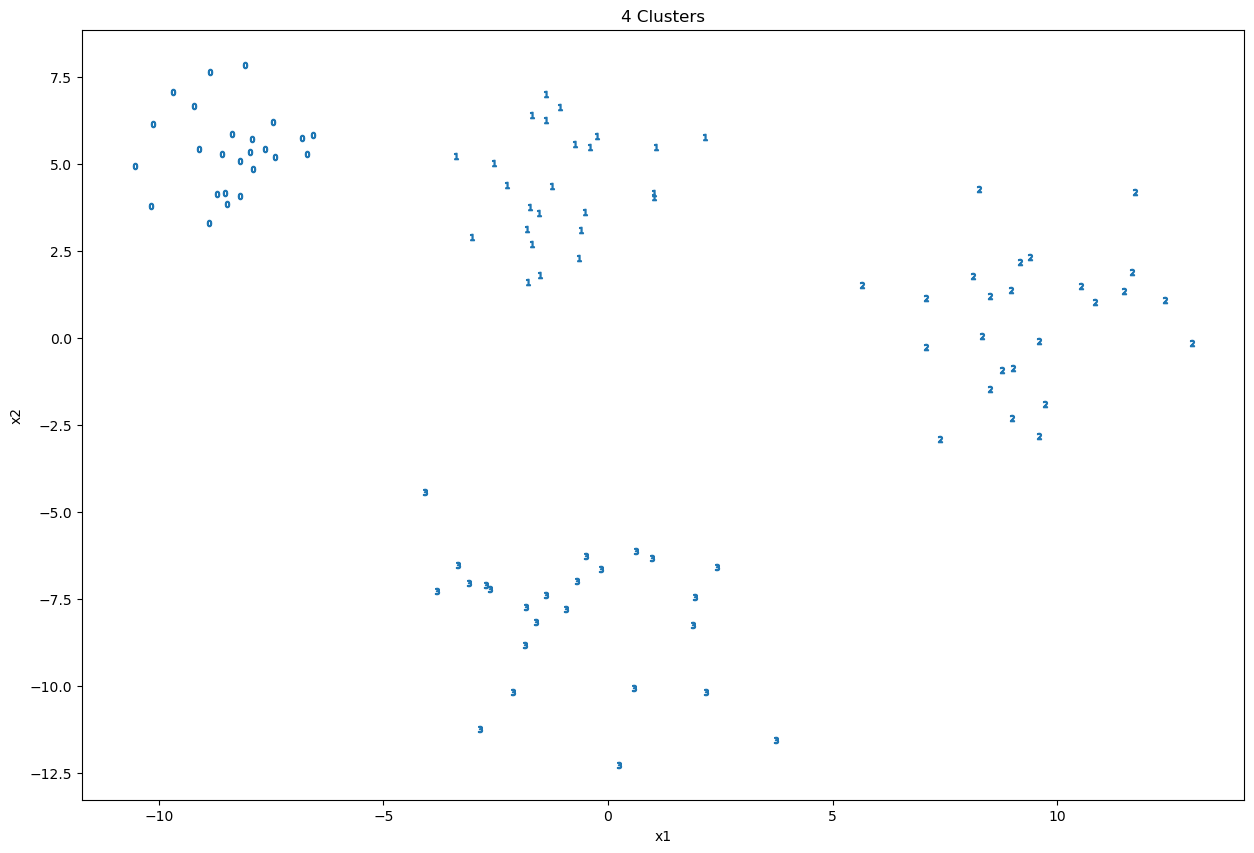

In [15]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
x, y = df_blobs[['x1','x2']], df_blobs['y']
plot_2d_clusters(x,y,ax)

## Aplicando clustering

In [17]:
#Cargamos la librería del algoritmo KMeans

from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=5, random_state=42)

In [24]:
y_pred = kmeans.fit_predict(x)

Text(0.5, 1.0, 'Kmeans 5 Clusters')

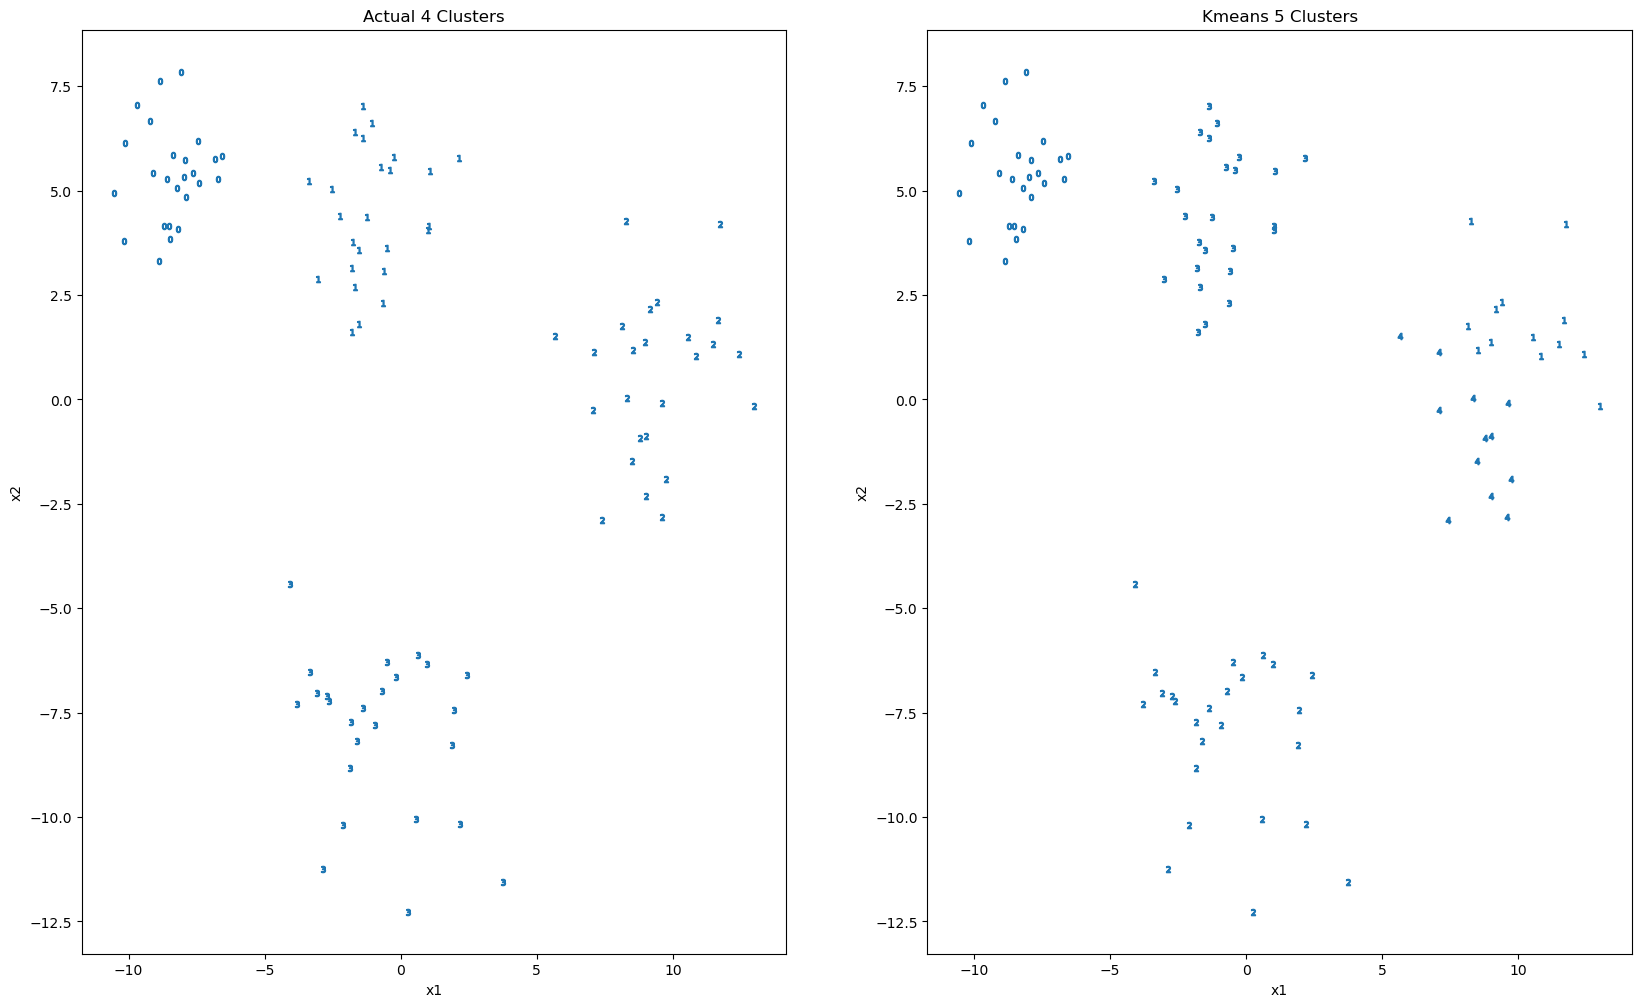

In [ ]:

fig, axs = plt.subplots(1,2, figsize=(20,12))
plot_2d_clusters(x,y,axs[0])
plot_2d_clusters(x,y_pred,axs[1])

axs[0].set_title(f'Actual {axs[0].get_title()}')
axs[1].set_title(f'Kmeans {axs[1].get_title()}')

